### analysis on datasets

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from tqdm import tqdm
from skimage.transform import resize


MICCAI_path = '../dataset/MICCAI/'
DSBowl_path = '../dataset/dsbowl/stage1_train/'
John_path = '../dataset/John Dataset/'


IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 3

# MICCAI

In [48]:
image_ids = next(os.walk(MICCAI_path+'Sample'))[2]
len(image_ids)

32

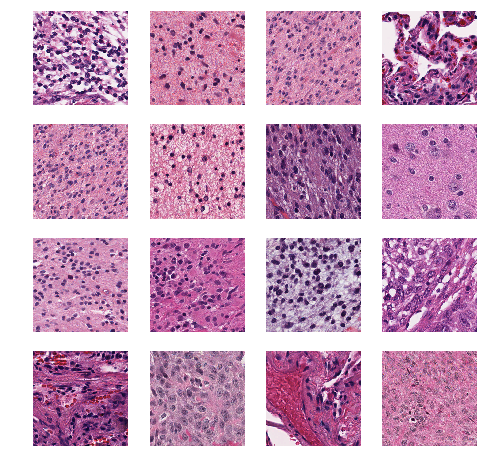

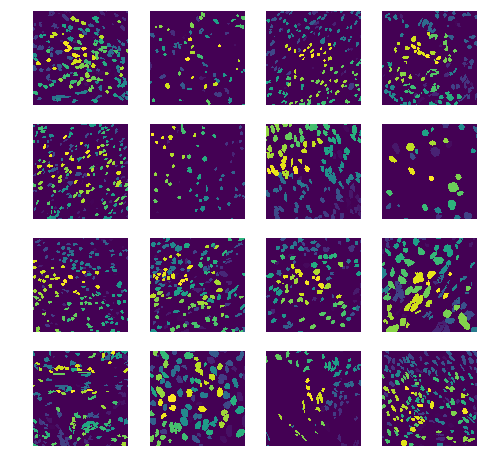

In [49]:
rows, cols = 4, 4
total_images = rows*cols

fig, ax = plt.subplots(rows, cols, figsize=(cols*2,rows*2))

image_samples = np.random.choice(image_ids, total_images, False)

for i, image_id in enumerate(image_samples):
    img = imread(MICCAI_path + 'Sample/' + image_id)
    ax[i//cols, i%cols].imshow(img)
    ax[i//cols, i%cols].axis('off')
plt.show()

fig, ax = plt.subplots(rows, cols, figsize=(cols*2,rows*2))

for i, image_id in enumerate(image_samples):
    image_id = image_id.replace('sample','mask')
    img = imread(MICCAI_path + 'Mask/' + image_id)
    ax[i//cols, i%cols].imshow(img)
    ax[i//cols, i%cols].axis('off')
plt.show()

In [49]:
img_sizes = {}
for i, image_id in enumerate(image_ids):
    img = imread(MICCAI_path + 'Sample/' + image_id)
    size = img.shape
    if size not in img_sizes:
        img_sizes[size] = 1
    else:
        img_sizes[size] += 1

img_sizes

{(500, 500, 4): 19, (600, 600, 3): 2, (600, 600, 4): 11}

In [52]:
mask_ids = next(os.walk(MICCAI_path+'Mask'))[2]
nucleus_count = {}
nucleus_count_all = []

for i, image_id in enumerate(mask_ids):
    img = imread(MICCAI_path + 'Mask/' + image_id)
    size = img.shape
    nucleus = len(np.unique(img))-1
#     print(img.shape, len(np.unique(img))-1)
    if size not in nucleus_count:
        nucleus_count[size] = [nucleus]
    else:
        nucleus_count[size] += [nucleus]
        
    nucleus_count_all += [nucleus]

In [67]:
print('Image Size & Count & Mean & SD & Mean per Pixel & SD per Pixel \\\\\\hline')
for size, nucleus in nucleus_count.items():
    
    print(f'{size[0]}x{size[1]} & {len(nucleus)} & {np.mean(nucleus):.2f} & {np.std(nucleus):.2f} & {np.mean(nucleus)/np.product(size):.5f} & {np.std(nucleus)/np.product(size):.5f} \\\\')

print(f'\\textbfTotal & {len(nucleus_count_all)} & {np.mean(nucleus_count_all):.2f} & {np.std(nucleus_count_all):.2f} & {np.mean(nucleus_count_all)/np.product(size):.5f} & {np.std(nucleus_count_all)/np.product(size):.5f} \\\\')


Image Size & Count & Mean & SD & Mean per Pixel & SD per Pixel \\\hline
500x500 & 19 & 102.37 & 46.00 & 0.00041 & 0.00018 \\
600x600 & 13 & 143.00 & 47.78 & 0.00040 & 0.00013 \\
\textbfTotal & 32 & 118.88 & 50.82 & 0.00033 & 0.00014 \\


# Kaggle

In [70]:
image_ids = next(os.walk(DSBowl_path))[1]
len(image_ids)

670

In [57]:
total_images = 1
image_samples = np.random.choice(image_ids, total_images, False)


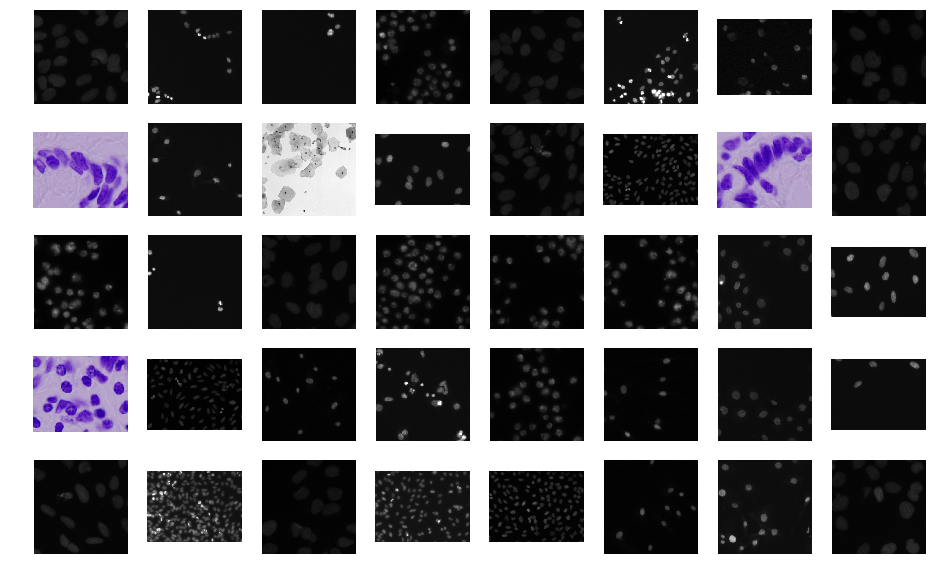

In [67]:
rows, cols = 5, 8
total_images = rows*cols

fig, ax = plt.subplots(rows, cols, figsize=(cols*2,rows*2))

image_samples = np.random.choice(image_ids, total_images, False)

for i, image_id in enumerate(image_samples):
    image_file = DSBowl_path + image_id + '/images/' + image_id + '.png'
    img = imread(image_file)
    ax[i//cols, i%cols].imshow(img)
    ax[i//cols, i%cols].axis('off')
plt.show()

11


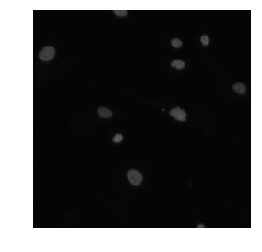

In [94]:
image_id = np.random.choice(image_ids, 1, False)[0]
mask_ids = next(os.walk(DSBowl_path + image_id + '/masks/' ))[2]

print(len(mask_ids))

image_file = DSBowl_path + image_id + '/images/' + image_id + '.png'
img = imread(image_file)
plt.imshow(img)
plt.axis('off')
plt.show()

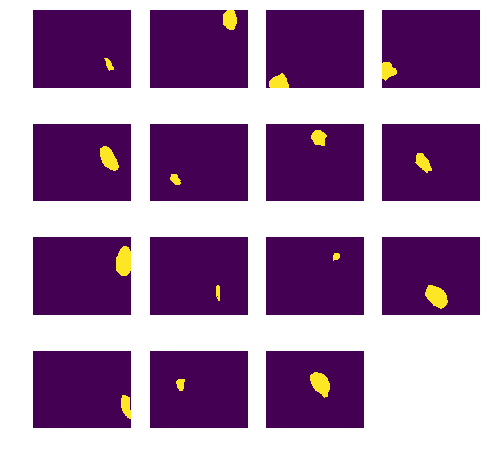

In [102]:
rows, cols = 4, 4
fig, ax = plt.subplots(rows, cols, figsize=(cols*2,rows*2))

for i, mask_id in enumerate(mask_ids):
    image_file = DSBowl_path + image_id + '/masks/' + mask_id
    img = imread(image_file)
    ax[i//cols, i%cols].imshow(img)
    ax[i//cols, i%cols].axis('off')

total_imgs = len(mask_ids)
counter = 0
for r in range(rows):
    for c in range(cols):
        if counter < total_imgs:
            mask_id = mask_ids[counter]
            image_file = DSBowl_path + image_id + '/masks/' + mask_id 
            img = imread(image_file)
            ax[r, c].imshow(img)
        ax[r, c].axis('off')
        counter += 1
        
plt.axis('off')
plt.show()

15


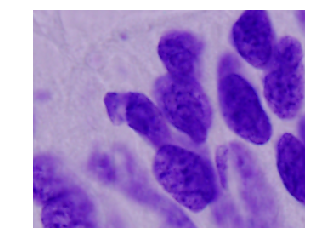

In [97]:
image_id = np.random.choice(image_ids, 1, False)[0]
mask_ids = next(os.walk(DSBowl_path + image_id + '/masks/' ))[2]

print(len(mask_ids))

image_file = DSBowl_path + image_id + '/images/' + image_id + '.png'
img = imread(image_file)
plt.imshow(img)
plt.axis('off')
plt.show()

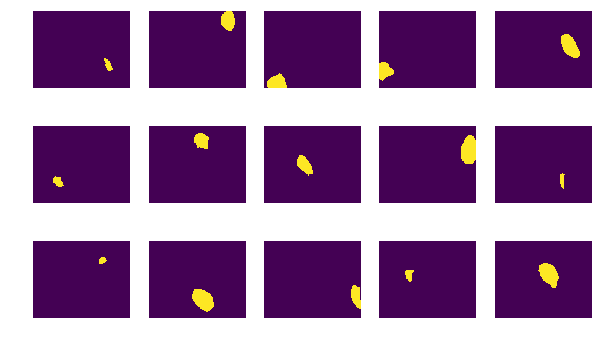

In [100]:
rows, cols = 3, 5
fig, ax = plt.subplots(rows, cols, figsize=(cols*2,rows*2))

for i, mask_id in enumerate(mask_ids):
    image_file = DSBowl_path + image_id + '/masks/' + mask_id
    img = imread(image_file)
    ax[i//cols, i%cols].imshow(img)
    ax[i//cols, i%cols].axis('off')

total_imgs = len(mask_ids)
counter = 0
for r in range(rows):
    for c in range(cols):
        if counter < total_imgs:
            mask_id = mask_ids[counter]
            image_file = DSBowl_path + image_id + '/masks/' + mask_id 
            img = imread(image_file)
            ax[r, c].imshow(img)
        ax[r, c].axis('off')
        counter += 1
        
plt.axis('off')
plt.show()

In [106]:
img_sizes = {}
for i, image_id in enumerate(image_ids):
    image_file = DSBowl_path + image_id + '/images/' + image_id + '.png'
    img = imread(image_file)
    size = img.shape
    if size not in img_sizes:
        img_sizes[size] = 1
    else:
        img_sizes[size] += 1

img_sizes

{(256, 256, 4): 334,
 (256, 320, 4): 112,
 (260, 347, 4): 5,
 (360, 360, 4): 91,
 (512, 640, 4): 13,
 (520, 696, 4): 92,
 (603, 1272, 4): 6,
 (1024, 1024, 4): 16,
 (1040, 1388, 4): 1}

In [71]:
nucleus_count = {}
nucleus_count_all = []

for i, image_id in enumerate(image_ids):
    image_file = DSBowl_path + image_id + '/images/' + image_id + '.png'
    img = imread(image_file)
    mask_ids = next(os.walk(DSBowl_path + image_id + '/masks/' ))[2]
#     print(img.shape, len(mask_ids))
    
    size = img.shape[:-1]
    nucleus = len(mask_ids)
    if size not in nucleus_count:
        nucleus_count[size] = [nucleus]
    else:
        nucleus_count[size] += [nucleus]
        
    nucleus_count_all += [nucleus] 

In [72]:
print('Image Size & Count & Mean & SD & Mean per Pixel & SD per Pixel \\\\\\hline')
for size, nucleus in nucleus_count.items():
    print(f'{size[0]}x{size[1]} & {len(nucleus)} & {np.mean(nucleus):.2f} & {np.std(nucleus):.2f} & {np.mean(nucleus)/np.product(size):.5f} & {np.std(nucleus)/np.product(size):.5f} \\\\')
    
print(f'\\textbfTotal & {len(nucleus_count_all)} & {np.mean(nucleus_count_all):.2f} & {np.std(nucleus_count_all):.2f} & {np.mean(nucleus_count_all)/np.product(size):.5f} & {np.std(nucleus_count_all)/np.product(size):.5f} \\\\')


Image Size & Count & Mean & SD & Mean per Pixel & SD per Pixel \\\hline
256x256 & 334 & 28.56 & 21.30 & 0.00044 & 0.00032 \\
603x1272 & 6 & 229.50 & 94.22 & 0.00030 & 0.00012 \\
256x320 & 112 & 41.80 & 30.57 & 0.00051 & 0.00037 \\
520x696 & 92 & 103.83 & 74.61 & 0.00029 & 0.00021 \\
360x360 & 91 & 23.45 & 5.29 & 0.00018 & 0.00004 \\
1024x1024 & 16 & 84.06 & 27.31 & 0.00008 & 0.00003 \\
260x347 & 5 & 81.60 & 47.03 & 0.00090 & 0.00052 \\
512x640 & 13 & 31.62 & 11.75 & 0.00010 & 0.00004 \\
1040x1388 & 1 & 14.00 & 0.00 & 0.00001 & 0.00000 \\
\textbfTotal & 670 & 43.97 & 47.93 & 0.00003 & 0.00003 \\


# CRLM

In [73]:
image_ids = next(os.walk(John_path+'png_image'))[2]
len(image_ids)

114

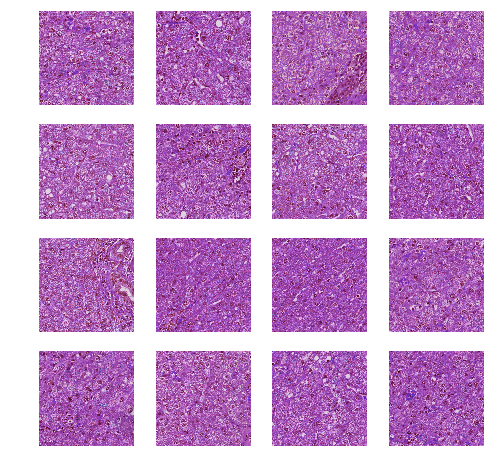

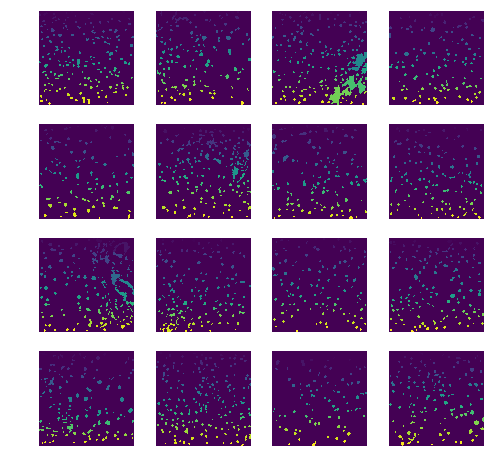

In [115]:
rows, cols = 4, 4
total_images = rows*cols

fig, ax = plt.subplots(rows, cols, figsize=(cols*2,rows*2))

image_samples = np.random.choice(image_ids, total_images, False)

for i, image_id in enumerate(image_samples):
    img = imread(John_path + 'png_image/' + image_id)
    ax[i//cols, i%cols].imshow(img)
    ax[i//cols, i%cols].axis('off')
plt.show()

fig, ax = plt.subplots(rows, cols, figsize=(cols*2,rows*2))

for i, image_id in enumerate(image_samples):
    image_id = image_id.replace('sample','mask')
    img = imread(John_path + 'mask/' + image_id)
    ax[i//cols, i%cols].imshow(img)
    ax[i//cols, i%cols].axis('off')
plt.show()

In [114]:
img_sizes = {}
for i, image_id in enumerate(image_ids):
    img = imread(John_path + 'png_image/' + image_id)
    size = img.shape
    if size not in img_sizes:
        img_sizes[size] = 1
    else:
        img_sizes[size] += 1

img_sizes

{(1000, 1000, 3): 114}

In [75]:
mask_ids = next(os.walk(John_path+'mask'))[2]
nucleus_count = {}
nucleus_count_all = []

for i, image_id in enumerate(mask_ids):
    img = imread(John_path + 'mask/' + image_id)
    size = img.shape
    nucleus = len(np.unique(img))-1
#     print(img.shape, len(np.unique(img))-1)
    if size not in nucleus_count:
        nucleus_count[size] = [nucleus]
    else:
        nucleus_count[size] += [nucleus]
        
    nucleus_count_all += [nucleus]

In [76]:
print('Image Size & Count & Mean & SD & Mean per Pixel & SD per Pixel \\\\\\hline')
for size, nucleus in nucleus_count.items():
    print(f'{size[0]}x{size[1]} & {len(nucleus)} & {np.mean(nucleus):.2f} & {np.std(nucleus):.2f} & {np.mean(nucleus)/np.product(size):.5f} & {np.std(nucleus)/np.product(size):.5f} \\\\')
    
print(f'\\textbfTotal & {len(nucleus_count_all)} & {np.mean(nucleus_count_all):.2f} & {np.std(nucleus_count_all):.2f} & {np.mean(nucleus_count_all)/np.product(size):.5f} & {np.std(nucleus_count_all)/np.product(size):.5f} \\\\')

Image Size & Count & Mean & SD & Mean per Pixel & SD per Pixel \\\hline
1000x1000 & 114 & 129.20 & 21.34 & 0.00013 & 0.00002 \\
\textbfTotal & 114 & 129.20 & 21.34 & 0.00013 & 0.00002 \\
